# Solution 1 - Using OLS
## Data Analysis
### FINM August Review 

Mark Hendricks

hendricks@uchicago.edu

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

# Data
* This homework uses the file, `data/multi_asset_etf_data.xlsx`.
* Find the data in the Github repo associated with the module, (link on Canvas.)

The data file contains...
* Return rates, $r_t^i$, for various asset classes, (via ETFs.)
* Most notable among these securities is SPY, the return on the S&P 500. Denote this as $r^{\spy}_t$.
* A separate tab gives return rates for a particular portfolio, $r_t^p$.

# 1. Regression
## 1. 
Estimate the regression of the portfolio return on SPY:

$$r^p_t = \alpha + \beta r^{\spy}_t + \epsilon_t^{p,\spy}$$

Specifically, report your estimates of alpha, beta, and the r-squared.

## 2. 
Estimate the regression of the portfolio return on SPY and on HYG, the return on high-yield
corporate bonds, denoted as $r^{\hyg}_t$:

$$r^p_t = {\alpha} + {\beta}^{\spy}r^{\spy}_t + {\beta}^{\hyg}r^{\hyg}_t + {\epsilon}_t$$

Specifically, report your estimates of alpha, the betas, and the r-squared.

*Note that the parameters (such as $\beta^{\spy}$) in this multivariate model are not the same as used in the univariate model of part 1. 

## 3. 
Calculate the series of fitted regression values, sometimes referred to as $\hat{y}$ in standard textbooks:

$$\hat{r}^p_t = \hat{\alpha} + \hat{\beta}^{\spy}r^{\spy}_t + \hat{\beta}^{\hyg}r^{\hyg}_t$$

Your statistical package will output these fitted values for you, or you can construct them using the estimated parameters.

How does this compare to the r-squared of the regression in problem 2?

## 4. 
How do the SPY betas differ across the univariate and multivariate models? How does this relate to the
correlation between $r^{\spy}$ and $r^{\hyg}$?

## 5. 
Without doing any calculation, would you expect the sample residual of the univariate regression or multivariate regression to have higher correlation to $r^{\hyg}$?

# <span style='color:red'>Solution 1</span>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [3]:
INFILE = "../data/multi_asset_etf_data.xlsx"

info = pd.read_excel(INFILE,sheet_name='info').set_index('ticker')
info

,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
ticker,,,,,,
SPY,SPDR S&P 500,ETF,USD,31915489,533350318080,The Trust seeks to achieve its investment obje...
EFA,iShares MSCI EAFE ETF,ETF,USD,14936082,54361296896,The fund generally will invest at least 80% of...
EEM,iShares MSCI Emerging Index Fun,ETF,USD,18737887,18598756352,The fund generally will invest at least 80% of...
PSP,Invesco Global Listed Private E,ETF,USD,7955,248697808,The fund generally will invest at least 90% of...
QAI,IQ Hedge MultiIQ Hedge Multi-St,ETF,USD,48268,560306880,"The fund is a ""fund of funds"" which means it i..."
HYG,iShares iBoxx $ High Yield Corp,ETF,USD,51364193,16733312000,The underlying index is a rules-based index co...
DBC,Invesco DB Commodity Index Trac,ETF,USD,891311,1784920832,The fund pursues its investment objective by i...
IYR,iShares U.S. Real Estate ETF,ETF,USD,3489431,2901542144,The fund seeks to track the investment results...
IEF,iShares 7-10 Year Treasury Bond,ETF,USD,5404923,29142607872,The underlying index measures the performance ...


In [3]:
rets = pd.read_excel("../data/hw_3_1_data.xlsx",sheet_name='security returns').set_index('Date')
rets

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
Date,,,,,,,,,,,,
2009-04-30,0.099346,0.115190,0.155582,0.230203,0.022882,0.138462,-0.001000,0.296151,-0.027451,0.008993,-0.017952,0.000554
2009-05-31,0.058453,0.131918,0.159400,0.053892,0.027865,0.028554,0.162663,0.022727,-0.020773,0.053671,0.019968,-0.000472
2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003436,0.033517,-0.026259,-0.024863,-0.005572,0.005149,0.001980,0.000599
2009-07-31,0.074606,0.100415,0.110146,0.143247,0.015326,0.069191,0.018568,0.105799,0.008318,0.031284,0.000879,-0.000027
2009-08-31,0.036939,0.045031,-0.013136,0.033413,-0.004151,-0.016970,-0.040365,0.131939,0.007634,0.007628,0.008414,0.000436
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.062887,0.090037,0.091293,0.133475,0.029164,0.036670,0.008925,0.099774,0.035811,0.035666,0.020763,0.003275
2023-02-28,-0.025143,-0.030748,-0.075677,-0.006542,-0.008535,-0.018852,-0.044632,-0.059618,-0.032708,-0.046942,-0.013530,0.002912
2023-03-31,0.037078,0.031291,0.032174,-0.048918,0.005854,0.019843,-0.000842,-0.019370,0.037211,0.047101,0.028643,0.005094


In [4]:
port =  pd.read_excel("../data/hw_3_1_data.xlsx",sheet_name='portfolio returns').set_index('Date')
port

,portfolio
Date,
2009-04-30,0.130446
2009-05-31,0.020928
2009-06-30,0.002894
2009-07-31,0.068172
2009-08-31,0.042209
...,...
2023-01-31,0.074556
2023-02-28,-0.026851
2023-03-31,-0.006306


## <span style='color:red'>1.1</span>

In [5]:
X = sm.add_constant(rets['SPY'])
y = port
mod = sm.OLS(y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     530.3
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           7.47e-54
Time:                        16:49:08   Log-Likelihood:                 469.82
No. Observations:                 170   AIC:                            -935.6
Df Residuals:                     168   BIC:                            -929.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.090      0.277      -0.004       0.001
SPY            0.6375      0.028     23.029      0.000       0.583       0.692
==============================================================================
Omnibus:                       15.613   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.219
Skew:                           0.390   Prob(JB):                     1.01e-07
Kurtosis:                       4.985   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style='color:red'>1.2</span>

In [6]:
X = sm.add_constant(rets[['SPY', 'HYG']])
y = port
mod_multi = sm.OLS(y, X).fit()
mod_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     427.6
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.99e-66
Time:                        16:49:08   Log-Likelihood:                 502.72
No. Observations:                 170   AIC:                            -999.4
Df Residuals:                     167   BIC:                            -990.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.001     -1.378      0.170      -0.003       0.001
SPY            0.3922      0.036     10.939      0.000       0.321       0.463
HYG            0.5253      0.059      8.884      0.000       0.409       0.642
==============================================================================
Omnibus:                        0.606   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.509
Skew:                           0.134   Prob(JB):                        0.775
Kurtosis:                       2.995   Cond. No.                         67.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the beta on SPY is much lower now that we include CL1. Also note that the R-squared is much higher.

## <span style='color:red'>1.3</span>

The squared correlation is exactly the R^2, as R^2 captures the correlation of Portfolio's return and the combined space spanned by both regressors.

In [7]:
corr_port = port.corrwith(mod.fittedvalues)[0]
corr_port_multi = port.corrwith(mod_multi.fittedvalues)[0]
print(f'Correlation between portfolio and replication: {corr_port_multi:.2%}.')
print(f'Square of this correaltion is {corr_port_multi**2:.2%}\nwhich equals the R-squared.')

Correlation between portfolio and replication: 91.47%.
Square of this correaltion is 83.66%
which equals the R-squared.


## <span style='color:red'>1.4</span>

In [8]:
TICKreg1 = 'SPY'
TICKreg2 = 'HYG'
corrREGS = rets[TICKreg2].corr(rets[TICKreg1])
print(f'Correlation between {TICKreg1} and {TICKreg2} is {corrREGS:.1%}')

Correlation between SPY and HYG is 77.0%


The beta for SPY in (2) is much smaller than in (1). This is because HYG and SPY are significantly correlated, therefore a large proportion of the variation in the Portfolio return which was being attributed to SPY (in eq 1) was actually better explained by HYG. Thus, in eq (2) this gets attributed more directly to HYG, and less is attributed to SPY.

## <span style='color:red'>1.5</span>

Without doing calculation, the intuition is that the second regression includes HYG as a regressor. Sample residuals are always uncorrelated (in-sample) to the regressors. Thus, in this regression we know the sample residual will have zero correlation to HYG. In the first regression, HYG was not a regressor, so it may have substantial correlation to the sample residual.

For population residuals, $\epsilon$, we still expect much smaller correlation to HYG in the second regression, though this population residual may still have some correlation to HYG.

In [9]:
print(f'Correlation between {TICKreg2} and the sample residual:\nUnivariate = {TICKreg1}: {rets[TICKreg2].corr(mod.resid):.2%}')
print(f'Multivariate = {TICKreg1} and {TICKreg2}: {rets[TICKreg2].corr(mod_multi.resid):.2%}')

Correlation between HYG and the sample residual:
Univariate = SPY: 36.15%
Multivariate = SPY and HYG: -0.00%


***

# 2. Decomposing and Replicating

## 1.
The portfolio return, $r_t^p$, is a combination of the base assets that are provided here. Use linear regression to uncover which weights were used in constructing the portfolio.

$$r_t^p = \alpha +\left(\boldsymbol{\beta}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the individual securities.
* What does the regression find were the original weights?
* How precise is the estimation? Consider the R-squared and t-stats.

*Feel free to include an $\alpha$ in this model, even though you know the portfolio is an exact function of the individual securities. The estimation should find $\alpha$ of (nearly) zero.*


## 2.

$$\newcommand{\targ}{EEM}$$

Suppose that we want to mimic a return, **EEM** using the other returns. Run the following regression–but
do so **only using data through the end of 2020.**

$$r_t^{\targ} = \alpha +\left(\boldsymbol{\beta}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the other securities, excluding the target, **EEM**.

#### (a) 
Report the r-squared and the estimate of the vector, $\boldsymbol{\beta}$.

#### (b) 
Report the t-stats of the explanatory returns. Which have absolute value greater than 2?

#### (c) 
Plot the returns of **EEM** along with the replication values.

## 3.
Perhaps the replication results in the previous problem are overstated given that they estimated the parameters within a sample and then evaluated how well the result fit in the same sample. This is known as in-sample fit.

Using the estimates through **2020**, (the α and βˆ from the previous problem,) calculate the out-of-sample (OOS) values of the replication, using the **2021-2023** returns, denoted $\boldsymbol{r}_t^{\text{oos}}$:

$$\hat{r}_t^{\targ} = \left(\widehat{\boldsymbol{\beta}}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t^{\text{oos}}$$

#### (a) 
What is the correlation between $\hat{r}_t^{\targ}$ and $\boldsymbol{r}_t^{\text{oos}}$?

#### (b) 
How does this compare to the r-squared from the regression above based on in-sample data, (through 2020?)

***

# <span style='color:red'>Solution 2</span>

## <span style='color:red'>2.1</span>

In [10]:
X = sm.add_constant(rets)
y = port
mod_exact = sm.OLS(y, X).fit()
display(mod_exact.params.to_frame().rename(columns={0:'weights'}).sort_values('weights',ascending=False).T.style.format('{:.2f}'))
mod_exact.summary()

,IEF,QAI,IYR,PSP,SHV,const,TIP,BWX,EFA,DBC,HYG,SPY,EEM
weights,0.25,0.25,0.25,0.25,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.509e+28
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:49:08   Log-Likelihood:                 5738.3
No. Observations:                 170   AIC:                        -1.145e+04
Df Residuals:                     157   BIC:                        -1.141e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.331e-16   5.34e-17      9.991      0.000    4.28e-16    6.39e-16
SPY          -4.9e-16   2.78e-15     -0.176      0.860   -5.98e-15       5e-15
EFA        -3.058e-16   2.84e-15     -0.108      0.914   -5.92e-15    5.31e-15
EEM         -6.96e-16   1.63e-15     -0.428      0.669   -3.91e-15    2.51e-15
PSP            0.2500   2.07e-15   1.21e+14      0.000       0.250       0.250
QAI            0.2500   7.55e-15   3.31e+13      0.000       0.250       0.250
HYG        -4.626e-16   3.29e-15     -0.140      0.888   -6.97e-15    6.04e-15
DBC        -3.406e-16   1.22e-15     -0.280      0.780   -2.75e-15    2.06e-15
IYR            0.2500   1.44e-15   1.74e+14      0.000       0.250       0.250
IEF            0.2500   5.15e-15   4.86e+13      0.000       0.250       0.250
BWX        -2.026e-16   3.45e-15     -0.059      0.953   -7.02e-15    6.62e-15
TIP        -6.563e-18   5.44e-15     -0.001      0.999   -1.08e-14    1.07e-14
SHV          1.96e-15   4.64e-14      0.042      0.966   -8.96e-14    9.35e-14
==============================================================================
Omnibus:                       15.142   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               34.008
Skew:                          -0.335   Prob(JB):                     4.12e-08
Kurtosis:                       5.086   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## <span style='color:red'>2.2</span>

In [11]:
T1 = '2023'
T2 = '2024'
TICKrep = 'EEM'

rets_IS = rets.loc[:T1,:]

X = sm.add_constant(rets_IS.drop(columns=TICKrep))
y = rets_IS[[TICKrep]]
mod_replicate = sm.OLS(y, X).fit()
mod_replicate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EEM   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     53.54
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.09e-42
Time:                        16:49:08   Log-Likelihood:                 323.58
No. Observations:                 141   AIC:                            -623.2
Df Residuals:                     129   BIC:                            -587.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.003     -0.436      0.663      -0.007       0.004
SPY           -0.1121      0.153     -0.732      0.466      -0.415       0.191
EFA            0.4998      0.137      3.649      0.000       0.229       0.771
PSP           -0.0035      0.114     -0.031      0.975      -0.228       0.221
QAI            0.7608      0.381      1.998      0.048       0.007       1.514
HYG            0.3013      0.180      1.674      0.097      -0.055       0.657
DBC           -0.0079      0.067     -0.117      0.907      -0.141       0.125
IYR            0.0683      0.078      0.880      0.381      -0.085       0.222
IEF           -0.9815      0.280     -3.508      0.001      -1.535      -0.428
BWX            0.5450      0.165      3.302      0.001       0.218       0.872
TIP            0.6943      0.294      2.361      0.020       0.112       1.276
SHV            3.5707      2.954      1.209      0.229      -2.273       9.414
==============================================================================
Omnibus:                        1.905   Durbin-Watson:                   2.324
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.469
Skew:                          -0.010   Prob(JB):                        0.480
Kurtosis:                       2.500   Cond. No.                     1.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The R-squared is reported in the table above.

Note that while we can estimate an R-squared, it doesn't make much sense in a regression without an intercept. 
- It does not need to be between 0 and 1.

The stats-models Python package puts a "Note" at the bottom of the table above reminding users of that fact.

### See the t-stats below, in descending order:

In [12]:
mod_replicate.tvalues.sort_values(ascending=False).to_frame().rename(columns={0:'t-stats'}).T.style.format('{:.1f}')

,EFA,BWX,TIP,QAI,HYG,SHV,IYR,PSP,DBC,const,SPY,IEF
t-stats,3.6,3.3,2.4,2.0,1.7,1.2,0.9,-0.0,-0.1,-0.4,-0.7,-3.5


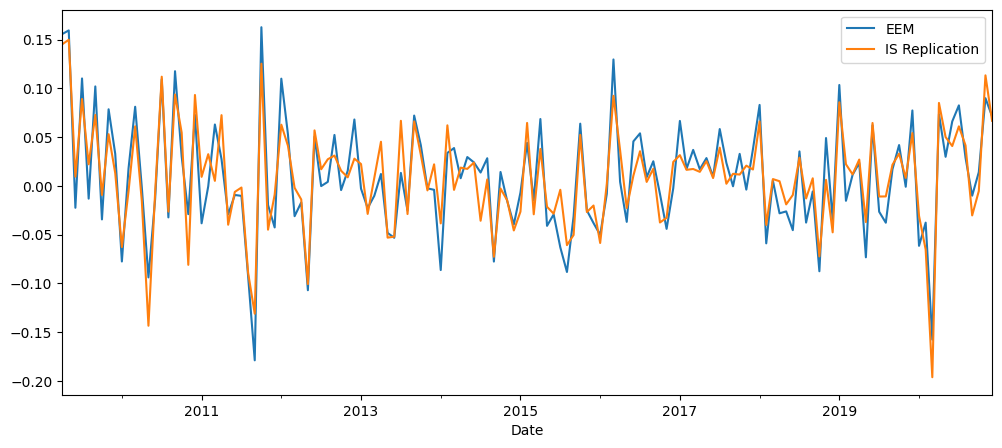

In [13]:
pd.concat([y, mod_replicate.fittedvalues.rename('IS Replication')], axis=1).plot(figsize=(12, 5))
plt.show()

## 2.3

In [14]:
reg = LinearRegression(fit_intercept=True).fit(X,y)
fit_comp_IS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'IS'})
corr_IS = fit_comp_IS.corr().iloc[0,1]

In [15]:
rets_OOS = rets.loc[T2:,:]
X = sm.add_constant(rets_OOS.drop(columns=TICKrep))
y = rets_OOS[[TICKrep]]

fit_comp_OOS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'OOS'})
corr_OOS = fit_comp_OOS.corr().iloc[0,1]

In [16]:
print(f'Correlation between {TICKrep} and Replicating Portfolio')
print(f'In-Sample: {corr_IS:.1%}')
print(f'Out-of-Sample: {corr_OOS:.1%}')

Correlation between EEM and Replicating Portfolio
In-Sample: 90.6%
Out-of-Sample: 76.7%


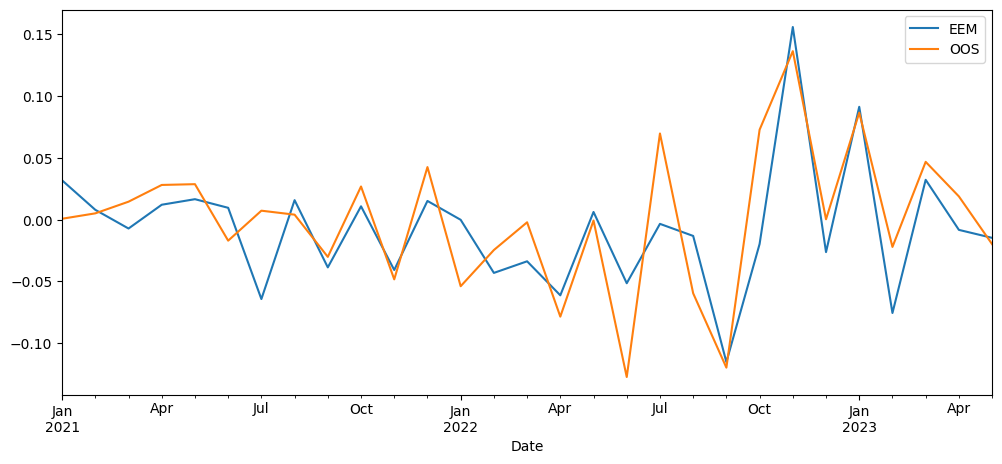

In [17]:
fit_comp_OOS.plot(figsize=(12, 5))
plt.show()